In [4]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [1]:
## Load in metada tafile
# 1. read metadata;
# smp_2_size, smp_2_donor
smp_2_size = {}
smp_2_donor = {}
smp_2_species = {}
smp_2_align = {}
species_2_phylum = {}
smp_2_phylum={}
Filtered_Species_smplist={}
Filtered_Species_donorlist={}
Filtered_Species_sizelist={}
with open('../Intermediary-files/filtered_samples.csv') as file:
    for line in file:
        if 'GenomeSize' not in line:
            smp, sp, size, donor, align, phylum = line.strip().split(',')[0],line.strip().split(',')[1], int(line.strip().split(',')[2]), line.strip().split(',')[3],line.strip().split(',')[4],line.strip().split(',')[7]
            smp_2_size[smp] = size
            smp_2_donor[smp] = donor
            smp_2_species[smp]=sp
            smp_2_align[smp]=align
            smp_2_phylum[smp]=phylum
            species_2_phylum[sp]=phylum
            if sp not in Filtered_Species_smplist:
                Filtered_Species_smplist[sp]=[]
                Filtered_Species_donorlist[sp]={}
                Filtered_Species_sizelist[sp]=[]
            Filtered_Species_smplist[sp].append(smp)
            Filtered_Species_sizelist[sp].append(size)
            if donor not in Filtered_Species_donorlist[sp]:
                Filtered_Species_donorlist[sp][donor]=[]
            Filtered_Species_donorlist[sp][donor].append(smp)

In [2]:
## 2. Read in ANI-distance matrix
import numpy as np

# Create distance matrix with ones
smplist = list(smp_2_species.keys())
dist_matrix = np.ones((len(smplist), len(smplist)))

# Create a dictionary for quick lookup of smplist indices
smplist_dict = {smp: idx for idx, smp in enumerate(smplist)}

# Open the file for reading
with open('../Intermediary-files/ANI.table.allpairs.list') as g:
    for i, line in enumerate(g):
        tmp = line.strip().split('\t')
        smp1 = tmp[0].split('.')[0]
        smp2 = tmp[1].split('.')[0]
        dist = float(tmp[2])
        idx_1 = smplist_dict.get(smp1)
        idx_2 = smplist_dict.get(smp2)
        if idx_1 is not None and idx_2 is not None:
            dist_matrix[idx_1, idx_2] = dist
            dist_matrix[idx_2, idx_1] = dist
        if i % 1000000 == 0:
            print(i)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
49000000
50000000
51000000
52000000
53000000
54000000
55000000
56000000
57000000
58000000
59000000
60000000
61000000
62000000
63000000
64000000
65000000
66000000
67000000
68000000
69000000
70000000
71000000
72000000
73000000
74000000
75000000
76000000
77000000
78000000
79000000
80000000
81000000
82000000
83000000
84000000
85000000
86000000
87000000
88000000
89000000


In [5]:
# Create a dictionary for quick lookup of smplist indices
    # smplist_dict = {smp: idx for idx, smp in enumerate(smplist)}
import random
import os
os.system('mkdir within-across-mash-log')
os.system('rm within-across-mash-log/*')
within_by_species={}
between_by_species={}
cutoff_pair = 100000

for sp in Filtered_Species_smplist:
    donor_with_more_than_10_isolates = 0
    for donor in Filtered_Species_donorlist[sp]:
        if len(Filtered_Species_donorlist[sp][donor])>=5:
            donor_with_more_than_10_isolates+=1
    
    if donor_with_more_than_10_isolates>=10:
        within=[]
        across=[]
        totpairs = len(Filtered_Species_donorlist[sp])*len(Filtered_Species_donorlist[sp])/2
        for smp1 in Filtered_Species_smplist[sp]:
            for smp2 in Filtered_Species_smplist[sp]:
                random_float = random.random()
                if smp1<smp2 and random_float<cutoff_pair/totpairs:
                    donor1 = smp_2_donor[smp1]
                    donor2 = smp_2_donor[smp2]
                    idx_1 = smplist_dict.get(smp1)
                    idx_2 = smplist_dict.get(smp2)
                    if donor1==donor2:
                        within.append(dist_matrix[idx_1, idx_2])
                    else:
                        across.append(dist_matrix[idx_1, idx_2])

        if len(within)>100 and len(across)>100:
            print(sp)
            fig, ax = plt.subplots(figsize=(5, 5))  # Set the width and height in inches
            # Define custom bin edges
            bin_edges = np.linspace(0, 0.05, 51)  # Adjust the bin edges as needed
            
            # Create density distribution plots with custom bins
            counts_within, bins, _ =plt.hist(across, bins=bin_edges, density=True, alpha=0.8, label='Between-people', color='#344E5C')
            
            counts_within, bins, _ =plt.hist(within, bins=bin_edges, density=True, alpha=0.8, label='Within-person', color='#FCD0BA')
            
            
            # Add labels and a legend
            plt.xlabel('ANI', fontsize=30)
            plt.ylabel('Density', fontsize=30)
            # legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)
            
            # Customize x-axis tick labels
            x_ticks_positions = [0,.02,.04]  # Positions where custom labels will be placed
            custome_x_ticks_positions = ["100%","98%","96%"]  # Positions where custom labels will be placed
            plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)
            
            # # Customize x-axis tick labels
            y_ticks_positions = []  # Positions where custom labels will be placed
            cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
            for cy in cus_y_ticks_positions:
                y_ticks_positions.append(cy*sum(counts_within))
            plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)
            
            
            # Modify the x-axis to display percentages
            plt.xlim(0,0.05)
            # Show the plot
            # fig.savefig('Fig1dsasdfafa2.pdf', dpi=600, bbox_inches='tight')
            plt.yscale('log')
            
            # # Customize x-axis tick labels
            y_ticks_positions = []  # Positions where custom labels will be placed
            cus_y_ticks_positions = [1,0.1,0.01]
            for cy in cus_y_ticks_positions:
                y_ticks_positions.append(cy*sum(counts_within))
            plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)
            plt.ylim(0.005*sum(counts_within),1*sum(counts_within))
            if sp =='Bifidobacterium_adolescentis':
                plt.ylim(0.001*sum(counts_within),1*sum(counts_within))
    
            plt.savefig('within-across-mash-log/'+sp+'.png',dpi=600, bbox_inches='tight')
            plt.close()
            within_by_species[sp]=within
            between_by_species[sp]=across

mkdir: within-across-mash-log: File exists
rm: within-across-mash-log/*: No such file or directory


Bacteroides_uniformis
Bacteroides_thetaiotaomicron
Parabacteroides_distasonis
Bacteroides_ovatus
Parabacteroides_merdae
Phocaeicola_vulgatus
Bacteroides_caccae
Escherichia_coli
Bifidobacterium_longum
Lacticaseibacillus_paracasei
Bacteroides_cellulosilyticus
Collinsella_sp900541125
Bacteroides_fragilis
Bacteroides_xylanisolvens
Lacticaseibacillus_rhamnosus
Bifidobacterium_adolescentis
Bifidobacterium_pseudocatenulatum
Bifidobacterium_catenulatum
Streptococcus_salivarius
Eggerthella_lenta


In [6]:
# Create a dictionary for quick lookup of smplist indices
    # smplist_dict = {smp: idx for idx, smp in enumerate(smplist)}
import random
import os
os.system('mkdir within-across-mash')
os.system('rm within-across-mash/*')
within_by_species={}
between_by_species={}
cutoff_pair = 100000

for sp in Filtered_Species_smplist:
    donor_with_more_than_10_isolates = 0
    for donor in Filtered_Species_donorlist[sp]:
        if len(Filtered_Species_donorlist[sp][donor])>=5:
            donor_with_more_than_10_isolates+=1
    
    if donor_with_more_than_10_isolates>=10:
        within=[]
        across=[]
        totpairs = len(Filtered_Species_donorlist[sp])*len(Filtered_Species_donorlist[sp])/2
        for smp1 in Filtered_Species_smplist[sp]:
            for smp2 in Filtered_Species_smplist[sp]:
                random_float = random.random()
                if smp1<smp2 and random_float<cutoff_pair/totpairs:
                    donor1 = smp_2_donor[smp1]
                    donor2 = smp_2_donor[smp2]
                    idx_1 = smplist_dict.get(smp1)
                    idx_2 = smplist_dict.get(smp2)
                    if donor1==donor2:
                        within.append(dist_matrix[idx_1, idx_2])
                    else:
                        across.append(dist_matrix[idx_1, idx_2])
        within_by_species[sp]=within
        between_by_species[sp]=across
        if len(within)>100 and len(across)>100:
            print(sp)
            fig, ax = plt.subplots(figsize=(10, 10))  # Set the width and height in inches
            # Define custom bin edges
            bin_edges = np.linspace(0, 0.05, 51)  # Adjust the bin edges as needed
            
            # Create density distribution plots with custom bins
            counts_within, bins, _ =plt.hist(across, bins=bin_edges, density=True, alpha=0.8, label='Between-people', color='#344E5C')
            
            counts_within, bins, _ =plt.hist(within, bins=bin_edges, density=True, alpha=0.8, label='Within-person', color='#FCD0BA')
            
            
            # Add labels and a legend
            plt.xlabel('ANI', fontsize=30)
            plt.ylabel('Density', fontsize=30)
            # legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)
            
            # Customize x-axis tick labels
            x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
            custome_x_ticks_positions = ["100%","99%","98%","97%","96%"]  # Positions where custom labels will be placed
            plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)
            
            # # Customize x-axis tick labels
            y_ticks_positions = []  # Positions where custom labels will be placed
            cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
            for cy in cus_y_ticks_positions:
                y_ticks_positions.append(cy*sum(counts_within))
            plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)
            
            
            # Modify the x-axis to display percentages
            plt.xlim(0,0.05)
            # Show the plot
            # fig.savefig('Fig1dsasdfafa2.pdf', dpi=600, bbox_inches='tight')
            # plt.yscale('log')
            
            # # Customize x-axis tick labels
            y_ticks_positions = []  # Positions where custom labels will be placed
            cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
            for cy in cus_y_ticks_positions:
                y_ticks_positions.append(cy*sum(counts_within))
            plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)

            plt.ylim(0.001*sum(counts_within),1*sum(counts_within))
            plt.title(sp,fontsize=30)
            plt.savefig('within-across-mash/'+sp+'.png',dpi=600, bbox_inches='tight')
            plt.close()
            

rm: within-across-mash/*: No such file or directory


Bacteroides_uniformis
Bacteroides_thetaiotaomicron
Parabacteroides_distasonis
Bacteroides_ovatus
Parabacteroides_merdae
Phocaeicola_vulgatus
Bacteroides_caccae
Escherichia_coli
Bifidobacterium_longum
Lacticaseibacillus_paracasei
Bacteroides_cellulosilyticus
Collinsella_sp900541125
Bacteroides_fragilis
Bacteroides_xylanisolvens
Lacticaseibacillus_rhamnosus
Bifidobacterium_adolescentis
Bifidobacterium_pseudocatenulatum
Bifidobacterium_catenulatum
Streptococcus_salivarius
Eggerthella_lenta


In [7]:
total_within=[]
total_between=[]
for sp in within_by_species:
    total_within=total_within+within_by_species[sp]
    total_between=total_between+between_by_species[sp]

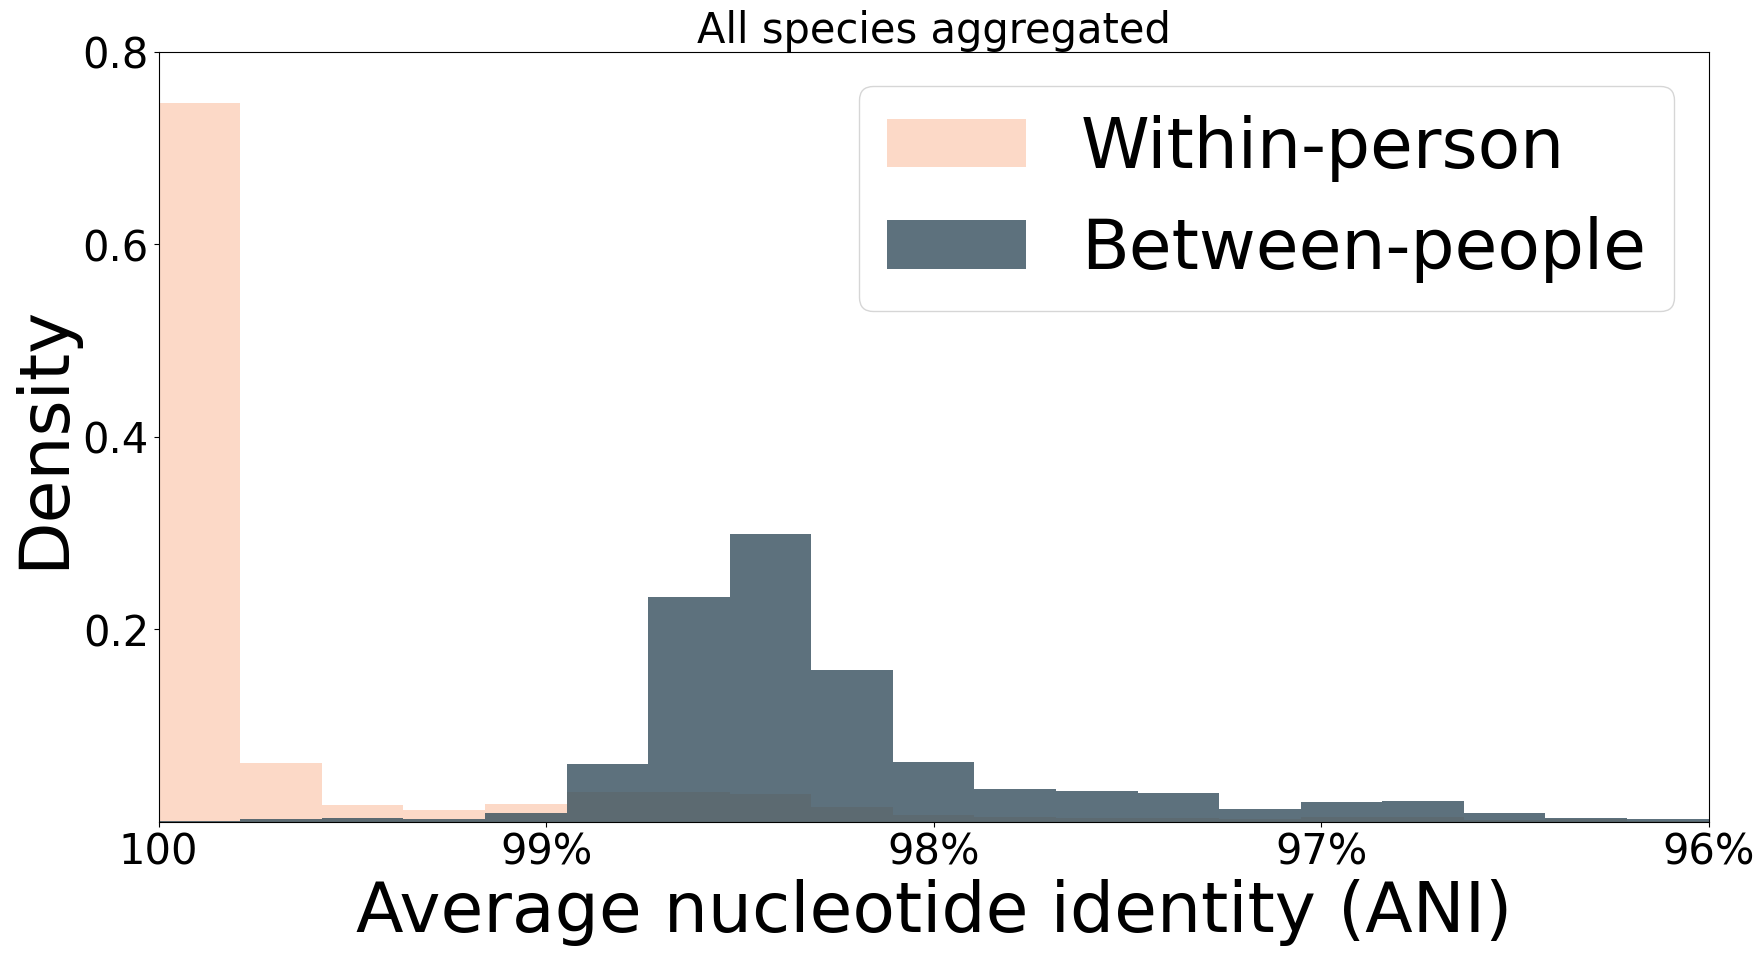

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(20, 10))  # Set the width and height in inches

# Define custom bin edges
bin_edges = np.linspace(0, 0.04, 20)  # Adjust the bin edges as needed

# Create density distribution plots with custom bins
counts_within, bins, _ =plt.hist(total_within, bins=bin_edges, density=True, alpha=0.8, label='Within-person', color='#FCD0BA')
counts_between, bins, _ =plt.hist(total_between, bins=bin_edges, density=True, alpha=0.8, label='Between-people', color='#344E5C')




# Add labels and a legend
plt.xlabel('Average nucleotide identity (ANI)', fontsize=50)
plt.ylabel('Density', fontsize=50)
legend = plt.legend(fontsize=50)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)

# Customize x-axis tick labels
x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*sum(counts_within))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)


# Modify the x-axis to display percentages
plt.xlim(0,0.04)
# plt.xlim(0,0.06)
# Show the plot
plt.title('All species aggregated',fontsize=30)
fig.savefig('figures/Figure2A.pdf', dpi=600, bbox_inches='tight')

plt.show()


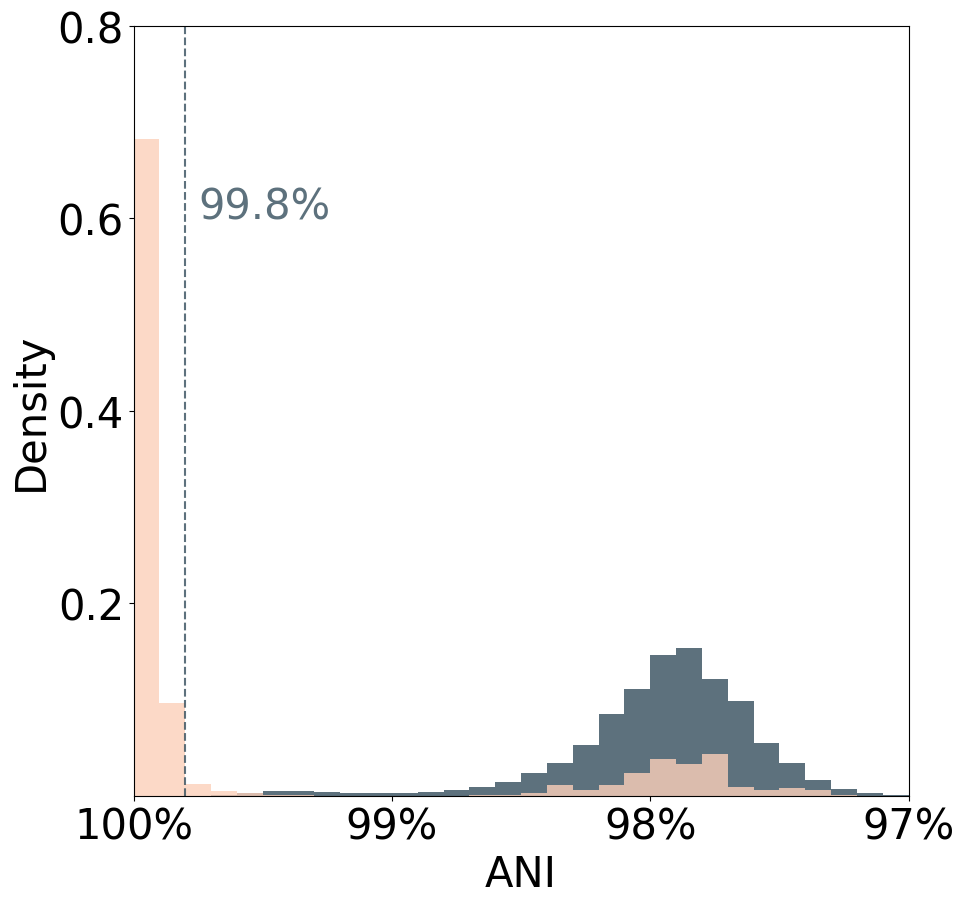

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 10))  # Set the width and height in inches

sp = 'Bacteroides_uniformis'
# Define custom bin edges
bin_edges = np.linspace(0, 0.03, 31)  # Adjust the bin edges as needed

within=within_by_species[sp]
between=between_by_species[sp]
# Create density distribution plots with custom bins
counts_within, bins, _ =plt.hist(between, bins=bin_edges, density=True, alpha=0.8, label='Between-people', color='#344E5C')

counts_within, bins, _ =plt.hist(within, bins=bin_edges, density=True, alpha=0.8, label='Within-person', color='#FCD0BA')



# Add labels and a legend
plt.xlabel('ANI', fontsize=30)
plt.ylabel('Density', fontsize=30)
# legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)

# Customize x-axis tick labels
x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100%","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*sum(counts_within))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)


# Modify the x-axis to display percentages
plt.xlim(0,0.03)
plt.plot([0.002,0.002],[0,800],'--',color='#344E5C',alpha=0.8)
plt.ylim(0,0.8*sum(counts_within))
plt.text(0.0025,0.6*sum(counts_within),'99.8%',fontsize=30,color='#344E5C',alpha=0.8)
# Show the plot
fig.savefig('figures/Figure2B-1.pdf', dpi=600, bbox_inches='tight')

plt.show()


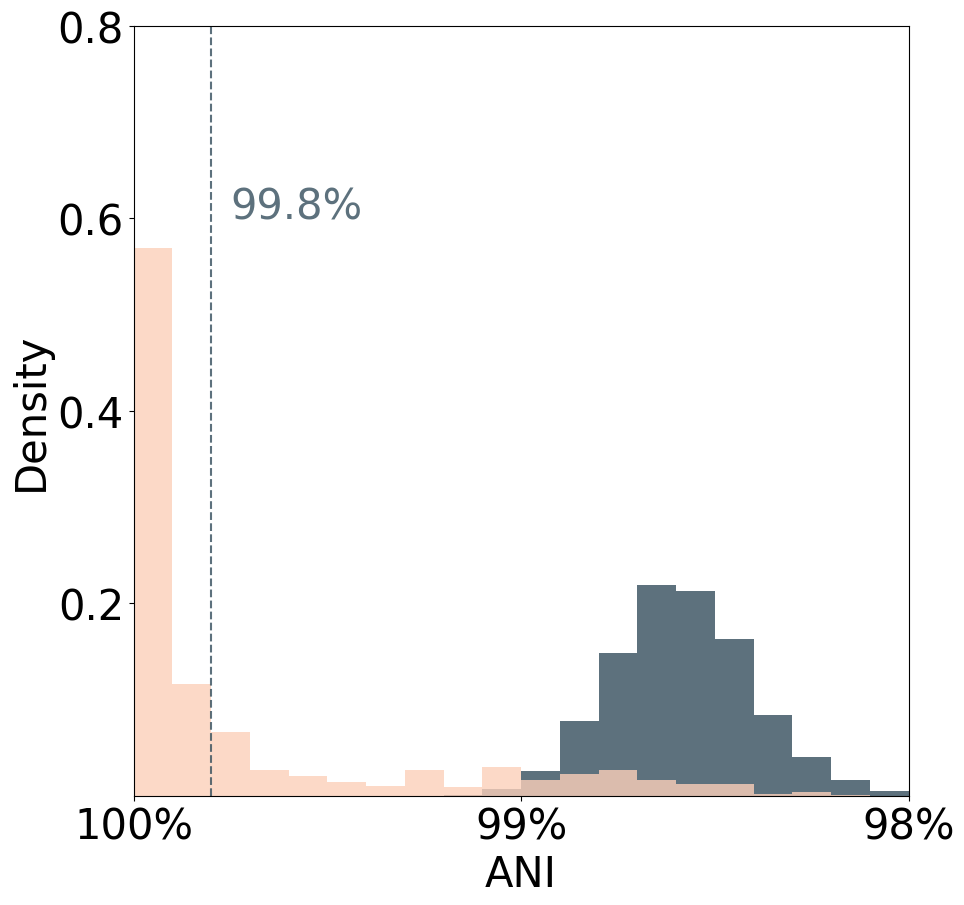

In [10]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 10))  # Set the width and height in inches

sp = 'Bifidobacterium_longum'
# Define custom bin edges
bin_edges = np.linspace(0, 0.02, 21)  # Adjust the bin edges as needed

within=within_by_species[sp]
between=between_by_species[sp]
# Create density distribution plots with custom bins
counts_within, bins, _ =plt.hist(between, bins=bin_edges, density=True, alpha=0.8, label='Between-people', color='#344E5C')
counts_within, bins, _ =plt.hist(within, bins=bin_edges, density=True, alpha=0.8, label='Within-person', color='#FCD0BA')




# Add labels and a legend
plt.xlabel('ANI', fontsize=30)
plt.ylabel('Density', fontsize=30)
# legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)

# Customize x-axis tick labels
x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100%","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*sum(counts_within))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)


# Modify the x-axis to display percentages
plt.xlim(0,0.02)
plt.plot([0.002,0.002],[0,800],'--',color='#344E5C',alpha=0.8)
plt.ylim(0,0.8*sum(counts_within))
plt.text(0.0025,0.6*sum(counts_within),'99.8%',fontsize=30,color='#344E5C',alpha=0.8)
# Show the plot
fig.savefig('figures/Figure2C-1.pdf', dpi=600, bbox_inches='tight')

plt.show()


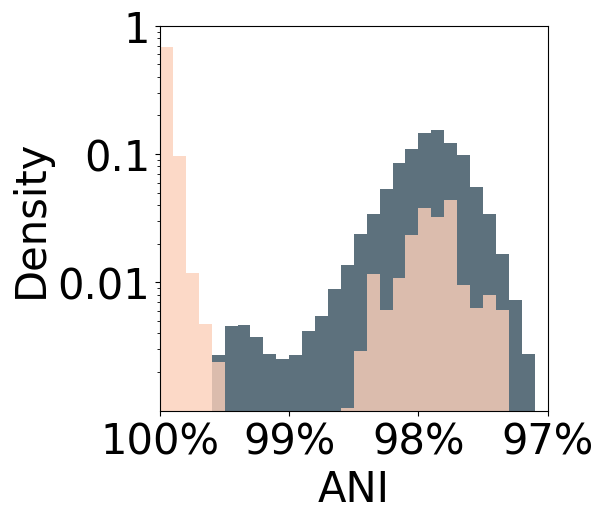

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(5, 5))  # Set the width and height in inches

sp = 'Bacteroides_uniformis'
# Define custom bin edges
bin_edges = np.linspace(0, 0.03, 31)  # Adjust the bin edges as needed

within=within_by_species[sp]
between=between_by_species[sp]
# Create density distribution plots with custom bins
counts_within, bins, _ =plt.hist(between, bins=bin_edges, density=True, alpha=0.8, label='Between-people', color='#344E5C')

counts_within, bins, _ =plt.hist(within, bins=bin_edges, density=True, alpha=0.8, label='Within-person', color='#FCD0BA')





# Add labels and a legend
plt.xlabel('ANI', fontsize=30)
plt.ylabel('Density', fontsize=30)
# legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)

# Customize x-axis tick labels
x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100%","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*sum(counts_within))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)


# Modify the x-axis to display percentages
plt.xlim(0,0.03)
# plt.plot([0.002,0.002],[0,800],'--',color='#344E5C',alpha=0.8)
# plt.ylim(0,0.8*sum(counts_within))
# plt.text(0.0025,0.6*sum(counts_within),'99.8%',fontsize=30,color='#344E5C',alpha=0.8)
# Show the plot
# fig.savefig('Fig1dsasdfafa2.pdf', dpi=600, bbox_inches='tight')
plt.yscale('log')


# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [1,0.1,0.01]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*sum(counts_within))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)
plt.ylim(0.001*sum(counts_within),1*sum(counts_within))
fig.savefig('figures/Figure2B-2.pdf', dpi=600, bbox_inches='tight')

plt.show()


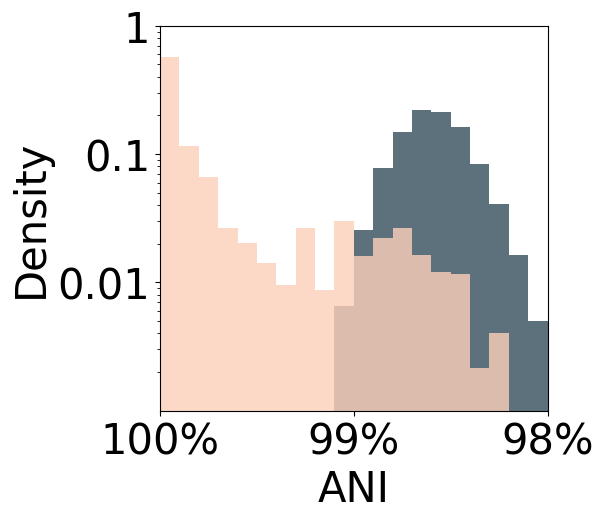

In [12]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(5, 5))  # Set the width and height in inches

sp = 'Bifidobacterium_longum'
# Define custom bin edges
bin_edges = np.linspace(0, 0.02, 21)  # Adjust the bin edges as needed

within=within_by_species[sp]
between=between_by_species[sp]
# Create density distribution plots with custom bins
counts_within, bins, _ =plt.hist(between, bins=bin_edges, density=True, alpha=0.8, label='Between-people', color='#344E5C')

counts_within, bins, _ =plt.hist(within, bins=bin_edges, density=True, alpha=0.8, label='Within-person', color='#FCD0BA')


# Add labels and a legend
plt.xlabel('ANI', fontsize=30)
plt.ylabel('Density', fontsize=30)
# legend = plt.legend(fontsize=30)  # Adjust 'large' to the desired size (e.g., 'small', 'medium', 'x-large', etc.)

# Customize x-axis tick labels
x_ticks_positions = [0, .01,.02,.03,.04]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["100%","99%","98%","97%","96%"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [0.8,0.6,0.4,0.2]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*sum(counts_within))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)


# Modify the x-axis to display percentages
plt.xlim(0,0.02)
# Show the plot
# fig.savefig('Fig1dsasdfafa2.pdf', dpi=600, bbox_inches='tight')
plt.yscale('log')

# # Customize x-axis tick labels
y_ticks_positions = []  # Positions where custom labels will be placed
cus_y_ticks_positions = [1,0.1,0.01]
for cy in cus_y_ticks_positions:
    y_ticks_positions.append(cy*sum(counts_within))
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)
plt.ylim(0.001*sum(counts_within),1*sum(counts_within))
fig.savefig('figures/Figure2C2.pdf', dpi=600, bbox_inches='tight')

plt.show()
